<a href="https://colab.research.google.com/github/Avit-hodibu/Seq2Seq/blob/main/Sequence2Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seq2seq Data**
Data where input has sequence data and output also has sequence data.  

Example: machine translation= you has give sentence "i am male" and you need to translate to nepali " ma purush ho"

**Why seq2seq data is difficult to slove?**
We have 3 challanges:
1. input since it is sentence, it is a variable length
2. the output sentence also be variable length.
3. no gurantee that when you give 3 word sentence input will be of 3 word sentence output.

3 word input can have 300 word output


Prerequiste

seq2seq--> RNN --> sequential data(basically language or sentence, timeseries, bioinformatic)

Many To Many RNN = sequence input give sequence of output.

It can be two type:
1. synchronous: similar length input give similar length output. For eg: POS tagging, NER
2. Asynchronous:squence of input length may not be equal to sqeuence of output length. For example:machine translation, text summary, question-answer,chatbot, speech to text.

In seq2seq model, we are taking about Asynchronous. It came to solve asynchronous architecture.
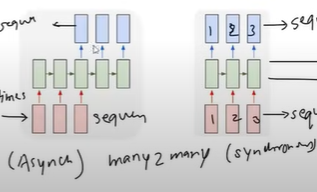

# History of seq2seq Model

Stage 1: Encoder-Decoder

Stage 2: Attention

Stage 3: Transformer

Stage 4: Transfer Learning

Stage 5: LLMs

# Encoder-Decoder Architecture

Architecture has 2 part:
- Encoder = It process input sequence. And it will compress all the information. This information is end to Decoder
- Decoder = Decoder take compress information and one-by-one produce output

Encoder-Decoder work good when we send small sentence. but, when we give long sentence, it lose the meaning.

What was happening is we are giving long sentence the compressor context vector it start to forget starting data. It is having memory loss problem. The translation depend upone what is in the context vector at last. To slove this problem we create attention machanism.


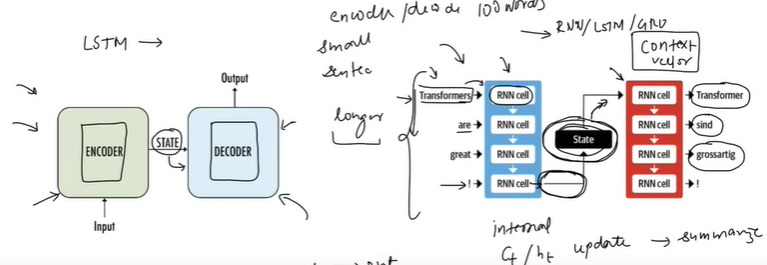



g

# Attention Mechanism

Representation is depend in context vector so in long sentence it won't able to capture starting word of paragraph or sentence. So, it will not able to convert properly in Encoder-Decoder. In encoder-decoder only after final step context vector give info to decoder about encoder.

But,in attention Mechanism, there is multiple context vector. Any step of the decoder have every information about encoder information. Internal state of encoder is available to communicate with decoder.

For to print single word we have information about every single encoder hiddenstate. But how to know which information is actual to print that word. At this time attention come into picture. Attention figure out which information in encoder is important to print that word from decoder with the help of Attention mechanism.

To print first word it take all hidden state infromtion and figure out using attention machinism and send to context vector and print. and for second also it repeat the process.

 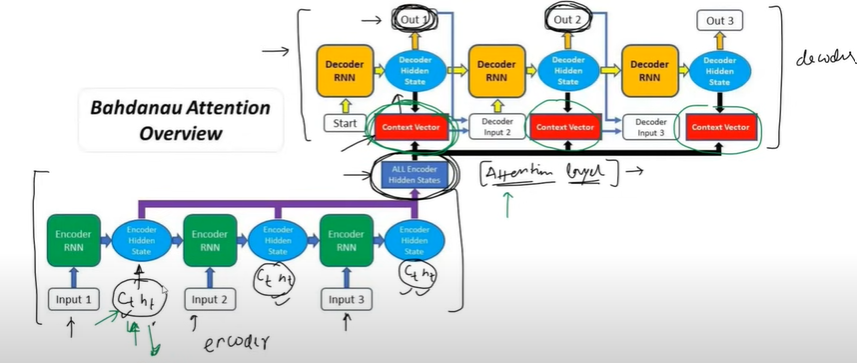

Disadvantage:

- computational complexity increase: we have to calculate each time all the ecoder to find the output each time.

# Transformers

LSTM work sequential order so it was increasing traing time. So, for parrell processing we use Transformers.

In transformers Architecture, they stop using LSTM. They use Attention in both encoder and decoder and along with that they use fully-connected dense layers. It can read simultaneously at once all the word of encoder input which why it is fast.

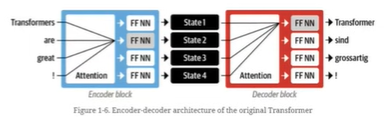

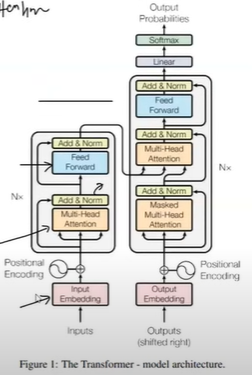

# Transfer Learning

Transformer required:
1. very good hardware
2. time
3. main reason is lot of data

To train from scratch in transformer is hard, So we introduce transfer learning.

Transfer Learning(TL) is a technique in which knowledge learned from a task is re-used in order to boost performance on a realated task.

we do fine tuning.

Why not use early because it was already use in CNN?
- task specificity: people think they cannot use one data of another task to another data
- lack of data in machine translation

ULMfit change it. In pretraining they didnot use machine translation. They use language modelling.
language modelling is a NLP task where we teach model to predict next word.

Why language modeling as pretraining task is successfull?
- rich feature learning: it not only understand basic understanding but also teach semantic and common sense very well.
- huge availablity of data: Till now we need label data as it was supervise model. but they use unsupervise where they donot need label data. So it can use huge data





In ULMfit, they did not use transformer

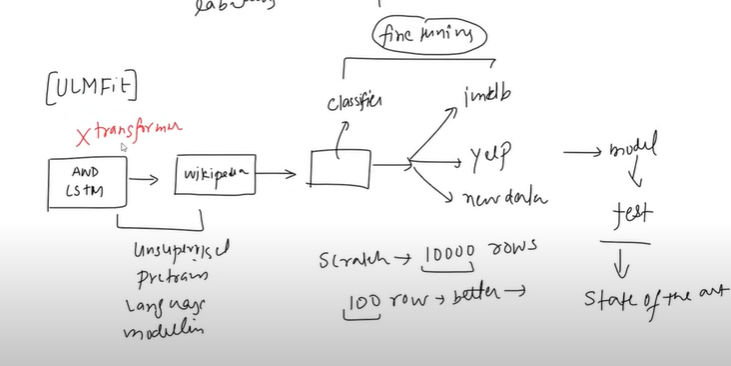

# LLM

Using transformer model was created which has huge dataset. Since it has huge dataset, you can do transfer learning from it.

we can use BERT and GPT use and do fine turning and get great result

Quality of LLMs
- Huge data
- Hardware- it need cluster of GPU (supercomputer)
- Traning time is huge
- cost is huge
- huge energy consumption